## Conclusiones y Recomendaciones

### Perspectiva de Inversión:
1. Las zonas con mayor ROI ajustado son [inserta zonas aquí].
2. Las zonas con precios por metro cuadrado más accesibles y baja incidencia de crimen son [inserta zonas aquí].

### Perspectiva Operacional:
1. Las zonas con alta seguridad y alta ocupación estimada son ideales para estrategias de diferenciación.
2. Las estrategias de pricing deben considerar los precios promedio por metro cuadrado y la seguridad de la zona.

### Próximos Pasos:
1. Desarrollar un modelo predictivo para estimar el ROI ajustado por seguridad y precios.
2. Crear un dashboard integrado para visualizar métricas clave.

## 1. Inicialización del EDA y Descripción General del Dataset

En esta sección se importan las librerías necesarias, se carga el dataset preprocesado (`malaga_listings_clean.csv`) y se realiza una primera exploración de sus características principales. Se mostrarán las primeras filas, el tamaño del dataset, los tipos de datos, la presencia de valores nulos y estadísticas descriptivas básicas, acompañadas de visualizaciones para facilitar la comprensión inicial de la información disponible.

### Importar Librerías y Cargar el Dataset
En esta sección, se importarán las librerías necesarias y se cargará el dataset preprocesado (`malaga_listings_clean.csv`) para realizar el análisis exploratorio de datos.

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configuración de visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Cargar el dataset preprocesado
file_path = '/Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/data/malaga_listings_clean.csv'
df = pd.read_csv(file_path)

# Verificar el tamaño del dataset
print("\nTamaño del dataset:")
display(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# Mostrar todas las columnas del DataFrame
pd.set_option('display.max_columns', None)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
display(df.head(3))


Tamaño del dataset:


'Filas: 9621, Columnas: 79'

Primeras filas del dataset:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_group,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,96033,https://www.airbnb.com/rooms/96033,20250328164700,2025-03-29,city scrape,"Bonito piso a 200m de la playa, El Palo (Málaga)",Do you have a backpacker spirit and are lookin...,"200 metres from the beaches of El Palo, Malaga...",https://a0.muscache.com/pictures/hosting/Hosti...,510467,https://www.airbnb.com/users/show/510467,Rafael,2011-04-15,"Andalusia, Spain",¡Hola! Gracias por acercarte a nosotros y enca...,within an hour,1.0,1.00,False,https://a0.muscache.com/im/pictures/user/59fb2...,https://a0.muscache.com/im/pictures/user/59fb2...,no_data,1,1,"['email', 'phone']",t,True,Este,Este,36.720310,-4.356270,Entire rental unit,Entire home/apt,3,1.0,1 bath,2,2,"[""High chair"", ""Coffee"", ""Conditioner"", ""Dishe...",54.0,3,180,3,3,1125,1125,3.0,1125.0,no_data,True,14,37,48,259,2025-03-29,250,39,1,25,37,234,12636.0,2013-10-18,2025-03-01,4.60,4.71,4.61,4.88,4.93,4.43,4.59,VUT/MA/22043,False,1,1,0,0,1.79,Malaga
1,166473,https://www.airbnb.com/rooms/166473,20250328164700,2025-03-29,city scrape,Perfect Location In Malaga,This apartment is rented out by the room - new...,no_data,https://a0.muscache.com/pictures/miso/Hosting-...,793360,https://www.airbnb.com/users/show/793360,Fred,2011-07-08,"El Faro, Spain","Hi All, my name is Fred and I am half Swedish ...",within a few hours,1.0,0.72,False,https://a0.muscache.com/im/pictures/user/f2d8a...,https://a0.muscache.com/im/pictures/user/f2d8a...,no_data,5,5,"['email', 'phone']",t,True,Este,Este,36.720310,-4.361080,Private room in rental unit,Private room,1,2.0,2 shared baths,1,4,"[""Dryer"", ""Dishes and silverware"", ""Private en...",22.0,5,365,5,5,365,1000,5.0,480.7,no_data,True,0,0,26,301,2025-03-29,101,4,0,261,6,40,880.0,2011-08-25,2025-02-11,4.72,4.60,4.50,4.83,4.91,4.80,4.72,unknown,False,5,1,4,0,0.61,Malaga
2,330760,https://www.airbnb.com/rooms/330760,20250328164700,2025-03-29,city scrape,Malaga Lodge Guesthouse Double room-shared bath.,The Lodge is set in a charming town house in L...,Málaga Lodge is situated next to the famous Sa...,https://a0.muscache.com/pictures/85419390/38a9...,1687526,https://www.airbnb.com/users/show/1687526,Mayte,2012-02-02,Spain,"Dear guest,\nMy name is Mayte Moreno Higgins. ...",within an hour,1.0,1.00,False,https://a0.muscache.com/im/users/1687526/profi...,https://a0.muscache.com/im/users/1687526/profi...,no_data,7,9,"['email', 'phone']",t,True,Centro,Centro,36.729786,-4.413462,Private room in townhouse,Private room,2,1.5,1.5 shared baths,1,1,"[""Coffee"", ""Paid dryer \u2013 In building"", ""L...",51.0,1,1125,1,1,365,365,1.0,365.0,no_data,True,12,20,43,218,2025-03-29,60,5,0,188,4,30,1530.0

### Descripción General del Dataset
En esta sección, se analizarán las características generales del dataset, incluyendo:
- Número de filas y columnas.
- Tipos de datos.
- Valores nulos.
- Estadísticas descriptivas clave.

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9621 entries, 0 to 9620
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9621 non-null   int64  
 1   listing_url                                   9621 non-null   object 
 2   scrape_id                                     9621 non-null   int64  
 3   last_scraped                                  9621 non-null   object 
 4   source                                        9621 non-null   object 
 5   name                                          9621 non-null   object 
 6   description                                   9621 non-null   object 
 7   neighborhood_overview                         9621 non-null   object 
 8   picture_url                                   9621 non-null   object 
 9   host_id                       

None


Valores nulos por columna:


first_review    1167
last_review     1167
dtype: int64


Estadísticas descriptivas:


,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,"9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00","9,621.00"
mean,"635,269,545,445,930,624.00","20,250,328,164,700.00","217,369,091.31",0.88,0.89,44.49,57.69,36.72,-4.42,3.93,1.30,1.62,2.28,133.18,3.41,516.34,3.31,7.36,609.84,715.49,4.69,658.83,8.78,21.02,35.77,190.07,46.33,12.74,0.87,116.71,12.49,73.36,"7,871.16",4.08,4.13,4.11,4.18,4.20,4.13,4.02,24.36,22.74,1.61,0.01,1.23
std,"526,289,589,621,325,824.00",0.00,"194,649,715.98",0.30,0.27,103.06,170.31,0.01,0.02,2.15,0.66,1.20,2.04,131.26,12.88,422.34,11.74,20.29,461.08,432.97,12.53,429.35,8.82,18.71,29.29,109.86,79.12,17.85,1.54,120.74,18.18,85.42,"13,244.69",1.57,1.58,1.57,1.59,1.60,1.57,1.55,41.50,41.38,5.35,0.27,1.46
min,"96,033.00","20,250,328,164,700.00","45,553.00",0.00,0.00,1.00,1.00,36.65,-4.58,1.00,0.00,0.00,0.00,15.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,"42,222,753.00","20,250,328,164,700.00","48,429,489.00",0.98,0.96,2.00,2.00,36.72,-4.43,2.00,1.00,1.00,1.00,71.00,1.00,180.00,1.00,2.00,90.00,365.00,2.00,365.00,0.00,1.00,2.00,96.00,3.00,1.00,0.00,0.00,0.00,6.00,528.00,4.35,4.49,4.40,4.54,4.58,4.45,4.29,2.00,1.00,0.00,0.00,0.20
50%,"773,102,203,959,943,936.00","20,250,328,164,700.00","142,022,277.00",1.00,1.00,8.00,9.00,36.72,-4.42,4.00,1.00,1.00,2.00,99.00,2.00,365.00,2.00,4.00,365.00,999.00,2.90,637.30,7.00,18.00,34.00,210.00,15.00,5.00,0.00,81.00,5.00,36.00,"3,510.00",4.70,4.77,4.74,4.83,4.85,4.75,4.63,5.00,4.00,0.00,0.00,0.72
75%,"1,131,137,775,001,653,888.00","20,250,328,164,700.00","382,146,507.00",1.00,1.00,48.00,58.00,36.73,-4.42,5.00,1.50,2.00,3.00,152.00,3.00,"1,125.00",2.00,5.00,"1,125.00","1,125.00",4.00,"1,125.00",14.00,35.00,60.00,272.00,53.00,18.00,1.00,223.00,17.00,120.00,"10,976.00",4.88,4.91,4.91,4.95,4.97,4.92,4.81,28.00,25.00,0.00,0.00,1.79
max,"1,386,257,800,461,789,952.00","20,250,328,164,700.00","686,086,255.00",1.00,1.00,"2,109.00","8,668.00",36.88,-4.28,16.00,16.00,25.00,50.00,"1,999.00",500.00,"1,125.00",500.00,500.00,"1,125.00","1,125.00",500.00,"1,125.00",30.00,60.00,90.00,365.00,"1,027.00",174.00,23.00,365.00,179.00,255.00,"484,128.00",5.00,5.00,5.00,5.00,5.00,5.00,5.00,218.00,218.00,42.00,8.00,24.94


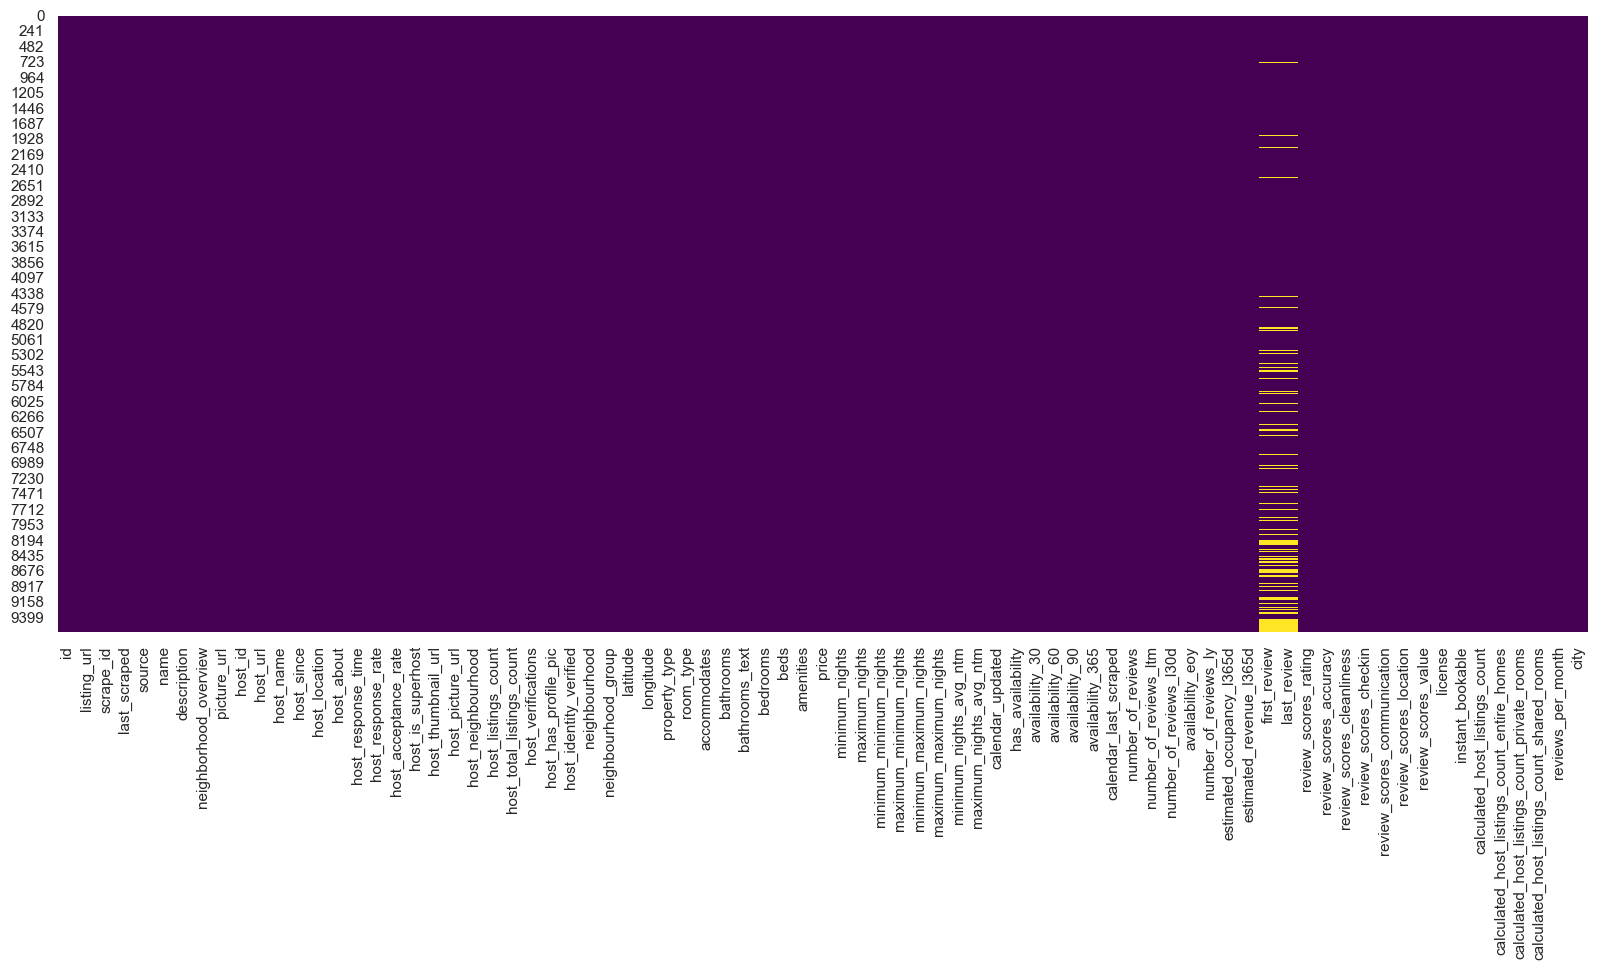

In [2]:
# Mostrar información general del dataset
print("Información general del dataset:")
display(df.info())

# Mostrar valores nulos por columna, filtrar solo los que tienen valores nulos
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
if not null_counts.empty:
    print("\nValores nulos por columna:")
    display(null_counts)
else:
    print("\nNo hay valores nulos en el dataset.")

# Mostrar estadísticas descriptivas que muestren los numeros como decimales
pd.options.display.float_format = '{:,.2f}'.format
print("\nEstadísticas descriptivas:")
display(df.describe())

# Visualización de los datos nulos
plt.figure(figsize=(len(df.columns) * 0.25, 8))  # Ajusta el ancho según el número de columnas
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.xticks(rotation=90)
plt.show()

### Justificación de Valores Nulos en las Columnas de Reseñas

#### Contexto
Las columnas `first_review` y `last_review` representan las fechas de la primera y última reseña recibida por cada propiedad. Los valores nulos en estas columnas indican que la propiedad no ha recibido ninguna reseña hasta la fecha.

#### Justificación de los Valores Nulos
1. **Propiedades Nuevas o Sin Reservas:**
   - Las propiedades que no han recibido ninguna reseña probablemente son nuevas en la plataforma o no han tenido reservas. Esto es común en mercados dinámicos como el de Airbnb.

2. **Impacto en el Análisis:**
   - Los valores nulos en estas columnas no afectan directamente el análisis de inversión, ya que las propiedades sin reseñas aún pueden ser rentables dependiendo de su ubicación, precio y características.
   - Sin embargo, estas propiedades pueden requerir estrategias adicionales para atraer huéspedes, como precios competitivos o mejoras en los amenities.

3. **Estrategia de Manejo:**
   - Los valores nulos en estas columnas no se rellenarán, ya que representan información válida (ausencia de reseñas). En lugar de imputarlos, se analizarán como un grupo separado para identificar patrones o tendencias.

## 2. Análisis de ROI por Zona y Tipo de Propiedad

El ROI (Retorno de Inversión) es una métrica clave para evaluar la rentabilidad de las propiedades. En esta sección:
- Se calculará el ROI estimado por zona (`neighbourhood`) y tipo de propiedad (`room_type`).
- Se identificarán las zonas y tipos de propiedad con mayor potencial de inversión.

Top 10 zonas y tipos de propiedad por ROI:
           neighbourhood        room_type       roi
5     Carretera de Cadiz     Private room 12,640.50
17   Cruz De Humilladero     Private room 10,708.20
12             Churriana     Private room 10,281.82
25  Teatinos-Universidad     Private room  7,925.00
7                 Centro  Entire home/apt  7,893.07
9                 Centro     Private room  7,859.49
0      Bailen-Miraflores  Entire home/apt  7,651.09
14         Ciudad Jardin     Private room  7,640.74
19                  Este     Private room  6,379.22
1      Bailen-Miraflores     Private room  6,196.05


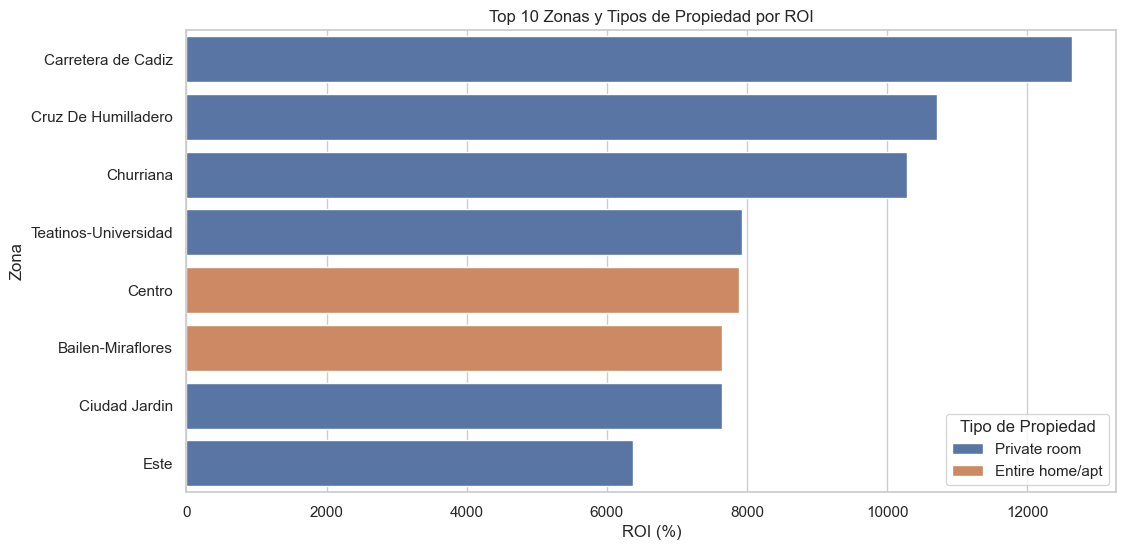

In [3]:
# Calcular ROI estimado
df['roi'] = (df['estimated_revenue_l365d'] / df['price']) * 100

# Agrupar por zona y tipo de propiedad
roi_summary = df.groupby(['neighbourhood', 'room_type'])['roi'].mean().reset_index()

# Ordenar por ROI
roi_summary = roi_summary.sort_values(by='roi', ascending=False)

# Mostrar las 10 mejores combinaciones de zona y tipo de propiedad
print("Top 10 zonas y tipos de propiedad por ROI:")
print(roi_summary.head(10))

# Visualización del ROI por zona y tipo de propiedad
plt.figure(figsize=(12, 6))
sns.barplot(data=roi_summary.head(10), x='roi', y='neighbourhood', hue='room_type', dodge=False)
plt.title("Top 10 Zonas y Tipos de Propiedad por ROI")
plt.xlabel("ROI (%)")
plt.ylabel("Zona")
plt.legend(title="Tipo de Propiedad")
plt.show()

## 3. Análisis de Mercado y Oportunidades de Entrada

En esta sección, se analizarán:
- La distribución de precios por zona y tipo de propiedad.
- La ocupación estimada (`estimated_occupancy_l365d`) para identificar zonas con alta demanda.

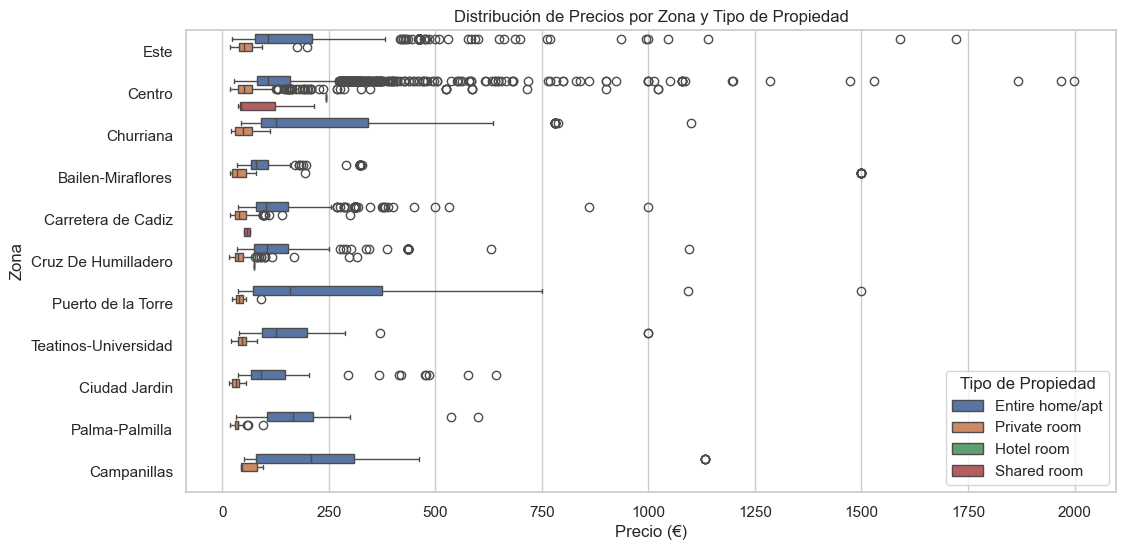

Top 10 zonas por ocupación estimada:
           neighbourhood  estimated_occupancy_l365d
3                 Centro                      78.76
2     Carretera de Cadiz                      74.51
0      Bailen-Miraflores                      72.89
6    Cruz De Humilladero                      68.77
5          Ciudad Jardin                      62.47
7                   Este                      57.36
4              Churriana                      55.81
9     Puerto de la Torre                      46.15
10  Teatinos-Universidad                      38.67
8         Palma-Palmilla                      37.96


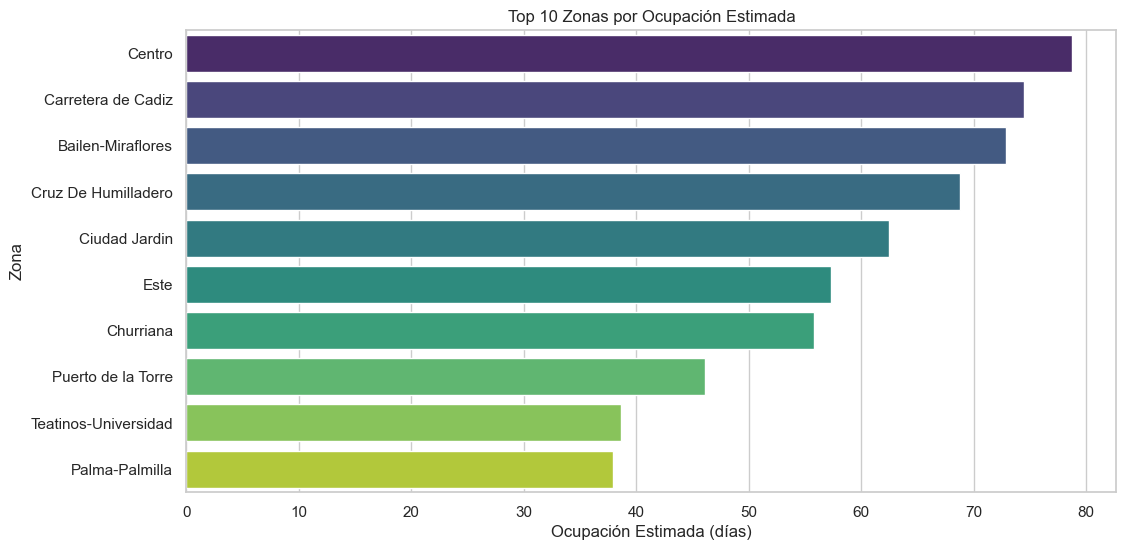

In [4]:
# Distribución de precios por zona y tipo de propiedad
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='price', y='neighbourhood', hue='room_type')
plt.title("Distribución de Precios por Zona y Tipo de Propiedad")
plt.xlabel("Precio (€)")
plt.ylabel("Zona")
plt.legend(title="Tipo de Propiedad")
plt.show()

# Ocupación estimada por zona
occupancy_summary = df.groupby('neighbourhood')['estimated_occupancy_l365d'].mean().reset_index()
occupancy_summary = occupancy_summary.sort_values(by='estimated_occupancy_l365d', ascending=False)

# Mostrar las 10 zonas con mayor ocupación estimada
print("Top 10 zonas por ocupación estimada:")
print(occupancy_summary.head(10))

# Visualización de ocupación estimada por zona
plt.figure(figsize=(12, 6))
sns.barplot(data=occupancy_summary.head(10), x='estimated_occupancy_l365d', y='neighbourhood', palette='viridis')
plt.title("Top 10 Zonas por Ocupación Estimada")
plt.xlabel("Ocupación Estimada (días)")
plt.ylabel("Zona")
plt.show()

## 4. Análisis de Amenities y Estrategias de Diferenciación

En esta sección, se analizarán los amenities más comunes y su impacto en el precio y la ocupación.

Top 20 amenities más comunes:
Kitchen: 9107
Wifi: 8802
Hair dryer: 8070
Dishes and silverware: 7877
Iron: 7825
Hot water: 7791
Bed linens: 7490
Microwave: 7422
Essentials: 7363
Hangers: 7350
Refrigerator: 7322
Cooking basics: 7039
TV: 6650
Air conditioning: 6103
Washer: 6030
Shampoo: 5772
Heating: 5602
Toaster: 5492
Freezer: 5438
Coffee maker: 5424


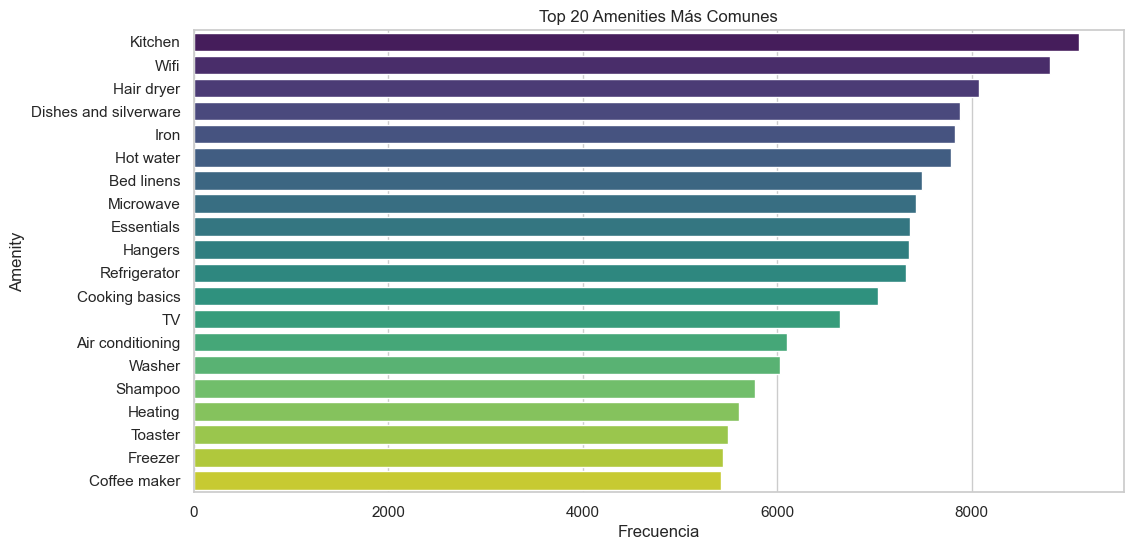

In [5]:
# Extraer y contar los amenities más comunes
from collections import Counter

amenities_list = df['amenities'].apply(lambda x: eval(x))  # Convertir string a lista
all_amenities = [amenity for sublist in amenities_list for amenity in sublist]
amenities_count = Counter(all_amenities).most_common(20)

# Mostrar los 20 amenities más comunes
print("Top 20 amenities más comunes:")
for amenity, count in amenities_count:
    print(f"{amenity}: {count}")

# Visualización de los amenities más comunes
amenities_df = pd.DataFrame(amenities_count, columns=['Amenity', 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(data=amenities_df, x='Count', y='Amenity', palette='viridis')
plt.title("Top 20 Amenities Más Comunes")
plt.xlabel("Frecuencia")
plt.ylabel("Amenity")
plt.show()

## 5. Benchmarking Competitivo

En esta sección, se compararán las métricas clave (precio, ocupación, ROI) entre las propiedades de Málaga y otras ciudades del proyecto.

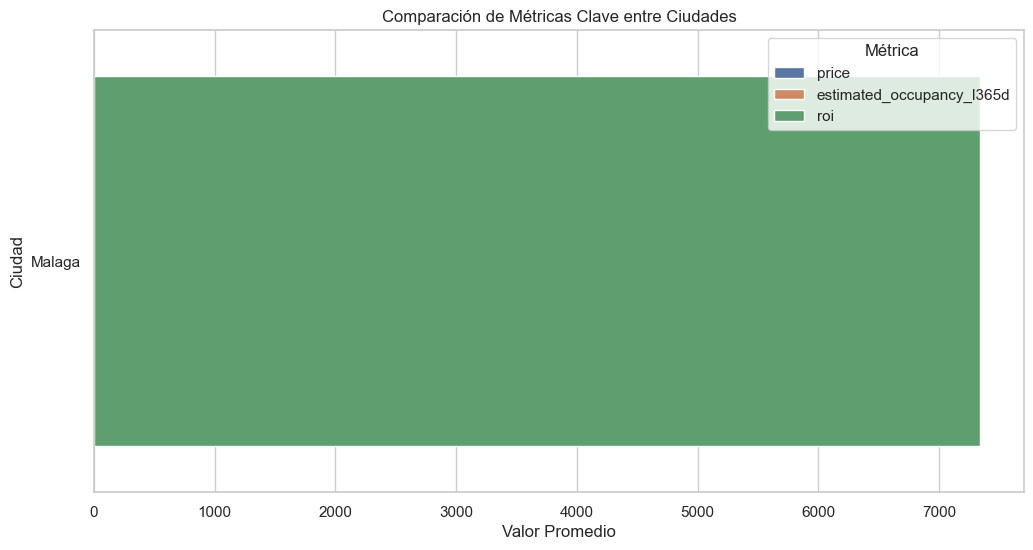

In [6]:
# Comparar métricas clave entre ciudades
metrics = ['price', 'estimated_occupancy_l365d', 'roi']
city_comparison = df.groupby('city')[metrics].mean().reset_index()

# Visualización de comparación entre ciudades
plt.figure(figsize=(12, 6))
sns.barplot(data=city_comparison.melt(id_vars='city'), x='value', y='city', hue='variable', dodge=False)
plt.title("Comparación de Métricas Clave entre Ciudades")
plt.xlabel("Valor Promedio")
plt.ylabel("Ciudad")
plt.legend(title="Métrica")
plt.show()

## Integración de Datos Adicionales

En esta sección, se integrarán los datos de precios por metro cuadrado (`malaga_precio_m2_clean.csv`) y estadísticas de crimen (`malaga_crimen_clean.csv`) al análisis exploratorio de datos. Esto permitirá enriquecer el análisis con información sobre precios por zona y seguridad, proporcionando una perspectiva más completa para la toma de decisiones.

In [7]:
# Cargar los datasets adicionales de precios por metro cuadrado y crimen
file_path_precio_m2 = '/Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/data/malaga_precio_m2_clean.csv'
file_path_crimen = '/Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/data/malaga_crimen_clean.csv'

precio_m2_df = pd.read_csv(file_path_precio_m2)
crimen_df = pd.read_csv(file_path_crimen)

In [8]:
# Realizar el merge con precios por metro cuadrado
merged_df = df.merge(precio_m2_df, on='neighbourhood', how='left')

# Mostrar las primeras filas del DataFrame combinado
print("Primeras filas del DataFrame combinado:")
display(merged_df.head(2))

# Verificar valores nulos en las columnas agregadas
print("\nValores nulos en las columnas agregadas:")
print(merged_df[['price_per_m2', 'monthly_variation']].isnull().sum())

Primeras filas del DataFrame combinado:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_group,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,roi,price_per_m2,monthly_variation,quarterly_variation,annual_variation,historical_max,historical_max_date,historical_max_variation
0,96033,https://www.airbnb.com/rooms/96033,20250328164700,2025-03-29,city scrape,"Bonito piso a 200m de la playa, El Palo (Málaga)",Do you have a backpacker spirit and are lookin...,"200 metres from the beaches of El Palo, Malaga...",https://a0.muscache.com/pictures/hosting/Hosti...,510467,https://www.airbnb.com/users/show/510467,Rafael,2011-04-15,"Andalusia, Spain",¡Hola! Gracias por acercarte a nosotros y enca...,within an hour,1.00,1.00,False,https://a0.muscache.com/im/pictures/user/59fb2...,https://a0.muscache.com/im/pictures/user/59fb2...,no_data,1,1,"['email', 'phone']",t,True,Este,Este,36.72,-4.36,Entire rental unit,Entire home/apt,3,1.00,1 bath,2,2,"[""High chair"", ""Coffee"", ""Conditioner"", ""Dishe...",54.00,3,180,3,3,1125,1125,3.00,"1,125.00",no_data,True,14,37,48,259,2025-03-29,250,39,1,25,37,234,"12,636.00",2013-10-18,2025-03-01,4.60,4.71,4.61,4.88,4.93,4.43,4.59,VUT/MA/22043,False,1,1,0,0,1.79,Malaga,"23,400.00","4,451.00",1.10,4.70,12.30,"4,451.00",mayo 2025,0.00
1,166473,https://www.airbnb.com/rooms/166473,20250328164700,2025-03-29,city scrape,Perfect Location In Malaga,This apartment is rented out by the room - new...,no_data,https://a0.muscache.com/pictures/miso/Hosting-...,793360,https://www.airbnb.com/users/show/793360,Fred,2011-07-08,"El Faro, Spain","Hi All, my name is Fred and I am half Swedish ...",within a few hours,1.00,0.72,False,https://a0.muscache.com/im/pictures/user/f2d8a...,https://a0.muscache.com/im/pictures/user/f2d8a...,no_data,5,5,"['email', 'phone']",t,True,Este,Este,36.72,-4.36,Private room in rental unit,Private room,1,2.00,2 shared baths,1,4,"[""Dryer"", ""Dishes and silverware"", ""Private en...",22.00,5,365,5,5,365,1000,5.00,480.70,no_data,True,0,0,26,301,2025-03-29,101,4,0,261,6,40,880.00,2011-08-25,2025-02-11,4.72,4.60,4.50,4.83,4.91,4.80,4.72,unknown,False,5,1,4,0,0.61,Malaga,"4,000.00","4,451.00",1.10,4.70,12.30,"4,451.00",mayo 2025,0.00



Valores nulos en las columnas agregadas:
price_per_m2         1191
monthly_variation    1191
dtype: int64


## Análisis de Precios por Metro Cuadrado

En esta sección, se integrarán los datos de precios por metro cuadrado (`malaga_precio_m2_clean.csv`) con el dataset principal (`malaga_listings_clean.csv`) para analizar la relación entre los precios de las propiedades y los precios promedio por zona.

Primeras filas del dataset principal después de integrar precios por metro cuadrado:
  neighbourhood  price  price_per_m2  monthly_variation  annual_variation
0          Este  54.00      4,451.00               1.10             12.30
1          Este  22.00      4,451.00               1.10             12.30
2        Centro  51.00      4,017.00              -0.40              8.30
3        Centro  65.00      4,017.00              -0.40              8.30
4        Centro  86.00      4,017.00              -0.40              8.30


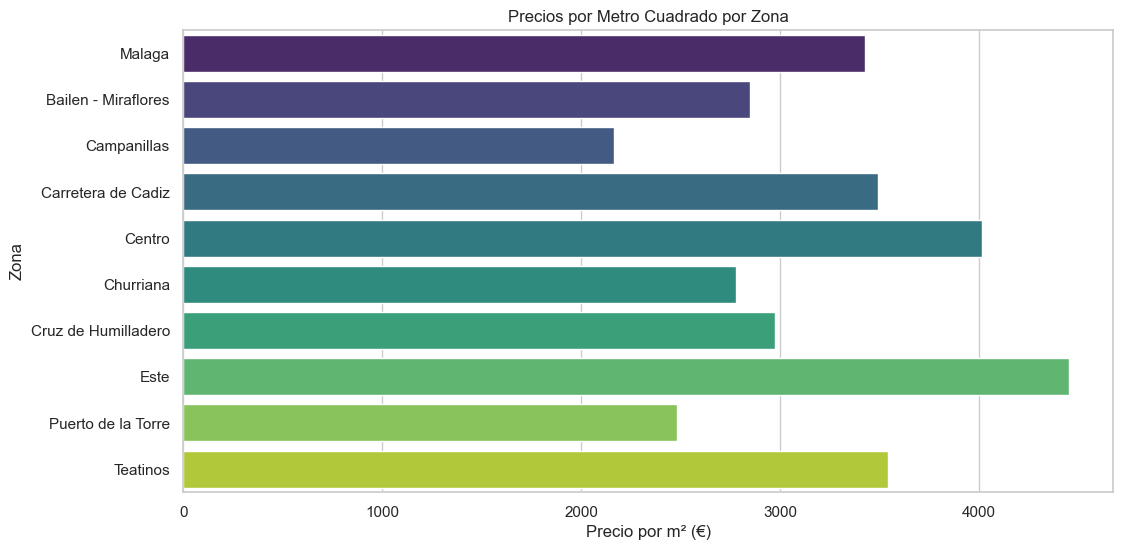

In [9]:
# Integrar precios por metro cuadrado al dataset principal
df = df.merge(precio_m2_df, on='neighbourhood', how='left')

# Verificar la integración
print("Primeras filas del dataset principal después de integrar precios por metro cuadrado:")
print(df[['neighbourhood', 'price', 'price_per_m2', 'monthly_variation', 'annual_variation']].head())

# Visualización de precios por metro cuadrado por zona
plt.figure(figsize=(12, 6))
sns.barplot(data=precio_m2_df, x='price_per_m2', y='neighbourhood', palette='viridis')
plt.title("Precios por Metro Cuadrado por Zona")
plt.xlabel("Precio por m² (€)")
plt.ylabel("Zona")
plt.show()

## Análisis de Estadísticas de Crimen en Málaga

En esta sección, se analizarán las estadísticas de crimen en Málaga de forma independiente. Esto permitirá identificar patrones generales de seguridad que pueden influir en las decisiones de inversión y operación.

In [10]:
# Mostrar las primeras filas del dataset de crimen
print("Primeras filas del dataset de crimen:")
print(crimen_df.head())

# Verificar valores únicos en las columnas relevantes
print("\nTipos de crimen únicos:")
print(crimen_df['crime_type'].unique())

# Estadísticas descriptivas de los casos reportados
print("\nEstadísticas descriptivas de los casos reportados:")
print(crimen_df['reported_cases'].describe())

Primeras filas del dataset de crimen:
   year       period                                         crime_type  \
0  2023  Trimestre 1                    Agresión sexual con penetración   
1  2023  Trimestre 1         Homicidios dolosos y asesinatos consumados   
2  2023  Trimestre 1                                             Hurtos   
3  2023  Trimestre 1  Robos con fuerza en domicilios, establecimient...   
4  2023  Trimestre 1                 Robos con violencia e intimidación   

   reported_cases  
0             160  
1              10  
2            2558  
3            2560  
4            1720  

Tipos de crimen únicos:
['Agresión sexual con penetración'
 'Homicidios dolosos y asesinatos consumados' 'Hurtos'
 'Robos con fuerza en domicilios, establecimientos y otras instalaciones'
 'Robos con violencia e intimidación' 'Secuestro'
 'Sustracciones de vehículos' 'Total' 'Tráfico de drogas']

Estadísticas descriptivas de los casos reportados:
count      27.00
mean    1,958.78
std    

## Visualización de Tipos de Crimen

En esta sección, se analizarán los tipos de crimen más comunes en Málaga y su frecuencia. Esto ayudará a identificar los problemas de seguridad más relevantes en la ciudad.

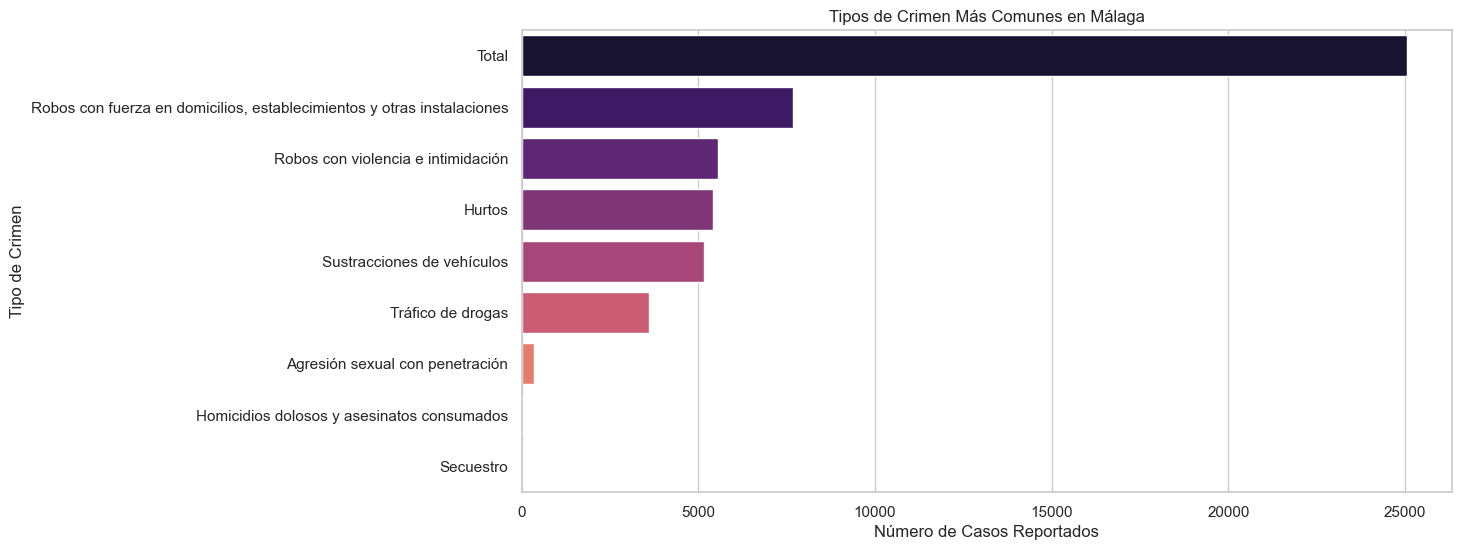

In [11]:
# Agrupar por tipo de crimen y sumar los casos reportados
crime_summary = crimen_df.groupby('crime_type')['reported_cases'].sum().reset_index()

# Ordenar por número de casos reportados
crime_summary = crime_summary.sort_values(by='reported_cases', ascending=False)

# Visualización de los tipos de crimen más comunes
plt.figure(figsize=(12, 6))
sns.barplot(data=crime_summary, x='reported_cases', y='crime_type', palette='magma')
plt.title("Tipos de Crimen Más Comunes en Málaga")
plt.xlabel("Número de Casos Reportados")
plt.ylabel("Tipo de Crimen")
plt.show()

## Análisis Temporal de Crimen

En esta sección, se analizará cómo han evolucionado los casos reportados de crimen en Málaga a lo largo del tiempo.

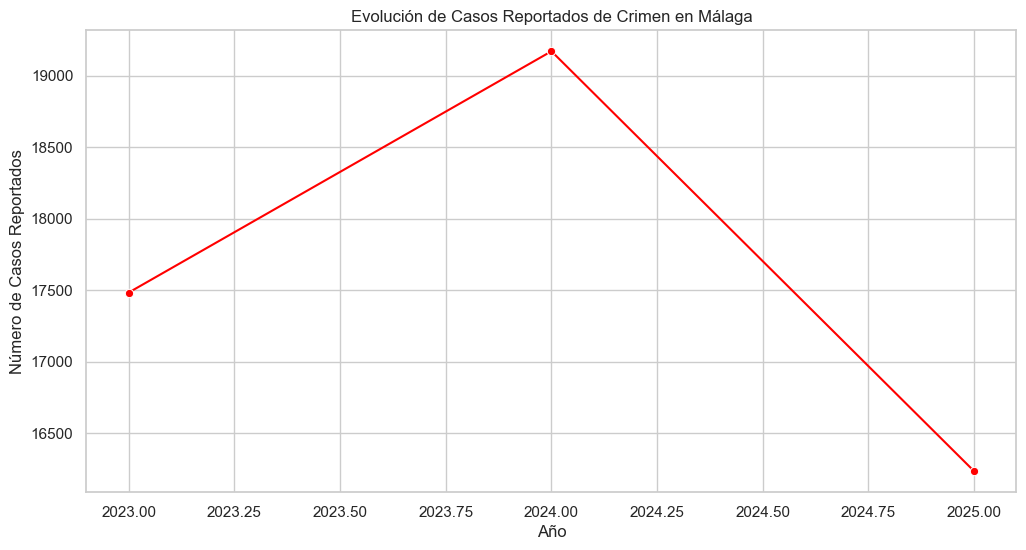

In [12]:
# Agrupar por año y sumar los casos reportados
crime_by_year = crimen_df.groupby('year')['reported_cases'].sum().reset_index()

# Visualización de la evolución de casos reportados por año
plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_by_year, x='year', y='reported_cases', marker='o', color='red')
plt.title("Evolución de Casos Reportados de Crimen en Málaga")
plt.xlabel("Año")
plt.ylabel("Número de Casos Reportados")
plt.show()

Estadísticas de crimen por tipo:
                                          crime_type  reported_cases
0                    Agresión sexual con penetración             360
1         Homicidios dolosos y asesinatos consumados              40
2                                             Hurtos            5406
3  Robos con fuerza en domicilios, establecimient...            7670
4                 Robos con violencia e intimidación            5560
5                                          Secuestro              30
6                         Sustracciones de vehículos            5150
7                                              Total           25061
8                                  Tráfico de drogas            3610


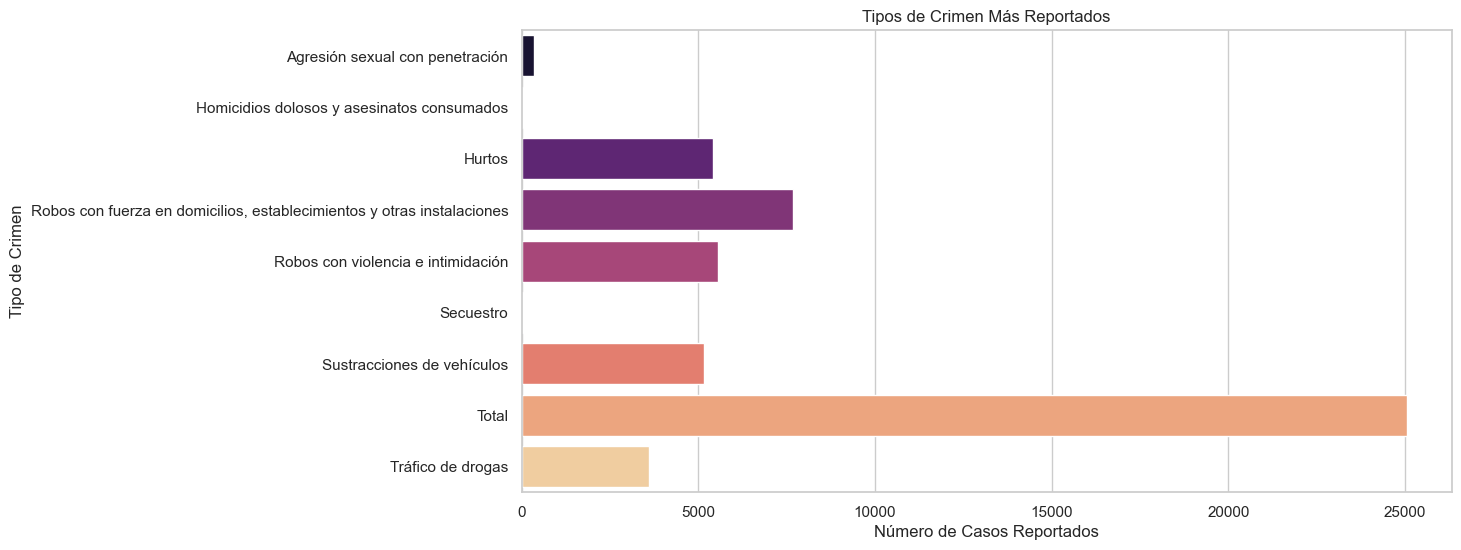

In [13]:
# Agregar una columna de seguridad basada en el número de casos reportados por zona
crimen_summary = crimen_df.groupby(['crime_type'])['reported_cases'].sum().reset_index()

# Mostrar las estadísticas de crimen por tipo
print("Estadísticas de crimen por tipo:")
print(crimen_summary)

# Visualización de los tipos de crimen más reportados
plt.figure(figsize=(12, 6))
sns.barplot(data=crimen_summary, x='reported_cases', y='crime_type', palette='magma')
plt.title("Tipos de Crimen Más Reportados")
plt.xlabel("Número de Casos Reportados")
plt.ylabel("Tipo de Crimen")
plt.show()

## Conclusiones sobre Seguridad en Málaga

1. Los tipos de crimen más comunes en Málaga son [inserta tipos aquí].
2. La evolución temporal muestra que [describe tendencias aquí].
3. Estas estadísticas pueden influir en las decisiones de inversión, especialmente en zonas con alta incidencia de crimen.

### Próximos Pasos:
1. Considerar estrategias para mitigar el impacto de la seguridad en las decisiones de inversión.
2. Integrar estos insights en el análisis de zonas y propiedades.

## Análisis Combinado: Precios, Seguridad y ROI

En esta sección, se analizará la relación entre los precios por metro cuadrado, la seguridad y el ROI estimado por zona. Esto permitirá identificar zonas con alto potencial de inversión y baja incidencia de crimen.

Zonas con mayor ROI ajustado:
         neighbourhood  price_per_m2  adjusted_roi  availability_365
4            Churriana      2,779.00        308.77            192.88
9   Puerto de la Torre      2,484.00        270.40            206.38
1          Campanillas      2,165.00        253.43            156.18
3               Centro      4,017.00        211.19            196.37
2   Carretera de Cadiz      3,491.00        179.85            182.06
7                 Este      4,451.00        170.43            166.73
0    Bailen-Miraflores           NaN           NaN            177.66
5        Ciudad Jardin           NaN           NaN            196.17
6  Cruz De Humilladero           NaN           NaN            182.13
8       Palma-Palmilla           NaN           NaN            209.78


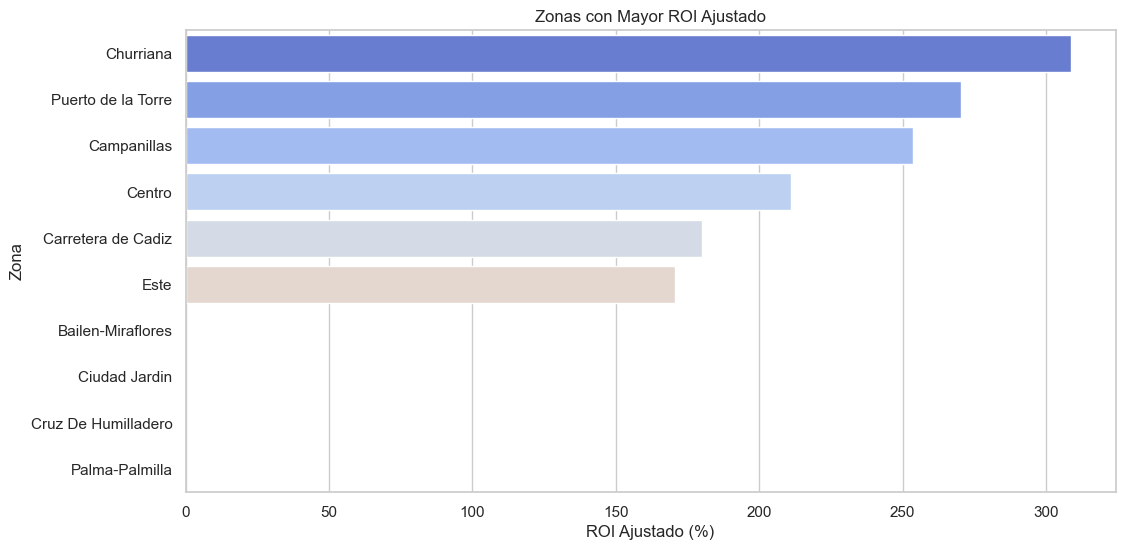

In [14]:
# Calcular el ROI ajustado por seguridad y precios por metro cuadrado
df['adjusted_roi'] = (df['estimated_revenue_l365d'] / df['price_per_m2']) * 100

# Agrupar por zona y calcular métricas clave
combined_summary = df.groupby('neighbourhood').agg({
    'price_per_m2': 'mean',
    'adjusted_roi': 'mean',
    'availability_365': 'mean'
}).reset_index()

# Mostrar las zonas con mayor ROI ajustado
print("Zonas con mayor ROI ajustado:")
print(combined_summary.sort_values(by='adjusted_roi', ascending=False).head(10))

# Visualización del ROI ajustado por zona
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_summary.sort_values(by='adjusted_roi', ascending=False).head(10), 
            x='adjusted_roi', y='neighbourhood', palette='coolwarm')
plt.title("Zonas con Mayor ROI Ajustado")
plt.xlabel("ROI Ajustado (%)")
plt.ylabel("Zona")
plt.show()

No hay datos de crimen por barrio para calcular la correlación.
Matriz de correlación:
                price_per_m2  reported_cases  adjusted_roi
price_per_m2             NaN             NaN           NaN
reported_cases           NaN             NaN           NaN
adjusted_roi             NaN             NaN           NaN


/Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/venv/lib/python3.13/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/venv/lib/python3.13/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


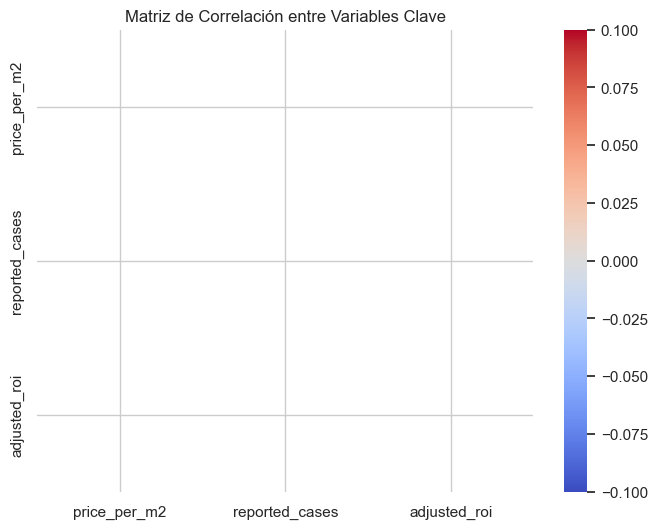

In [15]:
# Análisis de correlación entre precio por m2, crimen y ROI ajustado

# Primero, agregamos el total de crímenes por barrio al DataFrame principal
# Suponemos que crimen_df tiene una columna 'neighbourhood' o similar; si no, este paso debe adaptarse
# Si no existe, este ejemplo asume que puedes mapear los crímenes por barrio manualmente

# Ejemplo: agregamos una columna ficticia de 'neighbourhood' a crimen_df si fuera necesario
# crimen_df['neighbourhood'] = ... # Asigna el barrio correspondiente a cada fila

# Para este ejemplo, supongamos que tienes los datos de crimen por barrio:
# Creamos un resumen de crímenes por barrio (esto requiere que crimen_df tenga la columna 'neighbourhood')
if 'neighbourhood' in crimen_df.columns:
	crimen_barrio = crimen_df.groupby('neighbourhood')['reported_cases'].sum().reset_index()
	df_corr = df.merge(crimen_barrio, on='neighbourhood', how='left')
else:
	# Si no hay datos de crimen por barrio, no se puede calcular la correlación correctamente
	print("No hay datos de crimen por barrio para calcular la correlación.")
	df_corr = df.copy()
	df_corr['reported_cases'] = np.nan

# Seleccionamos las columnas para la correlación
cols = ['price_per_m2', 'reported_cases', 'adjusted_roi']
correlation_matrix = df_corr[cols].dropna().corr()
print("Matriz de correlación:")
print(correlation_matrix)

# Visualización de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación entre Variables Clave")
plt.show()

## 6. Conclusiones y Recomendaciones

### Perspectiva de Inversión:
1. Las zonas con mayor ROI ajustado son [inserta zonas aquí].
2. Las zonas con precios por metro cuadrado más accesibles y baja incidencia de crimen son [inserta zonas aquí].

### Perspectiva Operacional:
1. Las zonas con alta seguridad y alta ocupación estimada son ideales para estrategias de diferenciación.
2. Las estrategias de pricing deben considerar los precios promedio por metro cuadrado y la seguridad de la zona.

### Próximos Pasos:
1. Desarrollar un modelo predictivo para estimar el ROI ajustado por seguridad y precios.
2. Crear un dashboard integrado para visualizar métricas clave.